# Online Shoppers Purchasing Intention Analysis

Dataset Link -> https://drive.google.com/file/d/1QHS4CfUuDuxJql3RPD3TSCg8_WPsTh1V/view?usp=sharing

Report Link -> https://docs.google.com/document/d/1URFfGZhqxD8vChwJUH8Mfrz5atPs-Jl_qATwbWxwLss/edit?usp=sharing

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [ ]:
data=pd.read_csv("online_shoppers_intention.csv")

In [ ]:
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
data.isnull().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


We do not need to handle null values .

### Visualizing Data

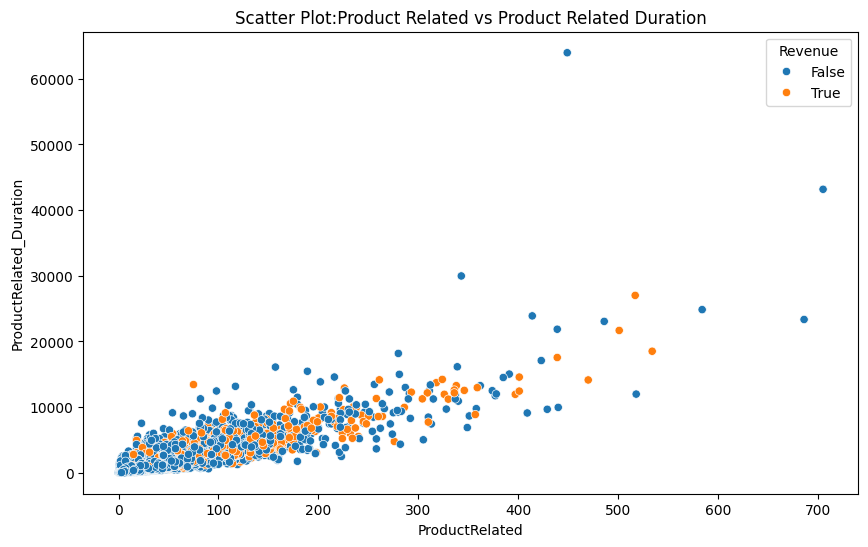

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='ProductRelated',y='ProductRelated_Duration',hue='Revenue',data=data)
plt.title('Scatter Plot:Product Related vs Product Related Duration')
plt.show()

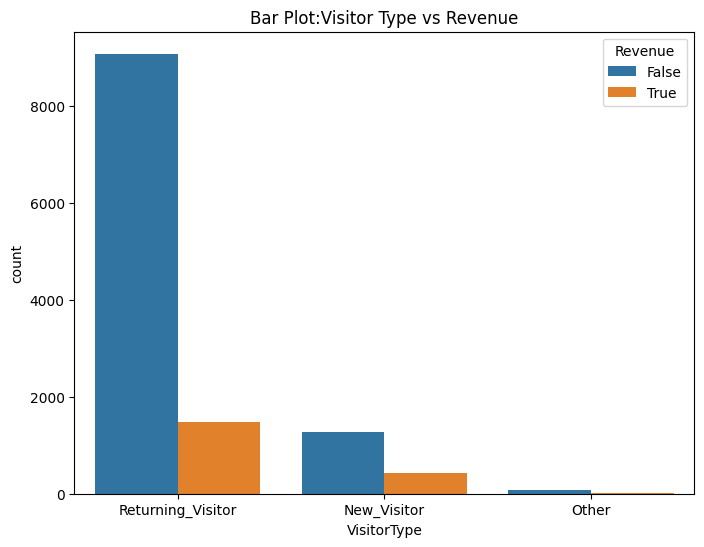

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='VisitorType',hue='Revenue',data=data)
plt.title('Bar Plot:Visitor Type vs Revenue')
plt.show()

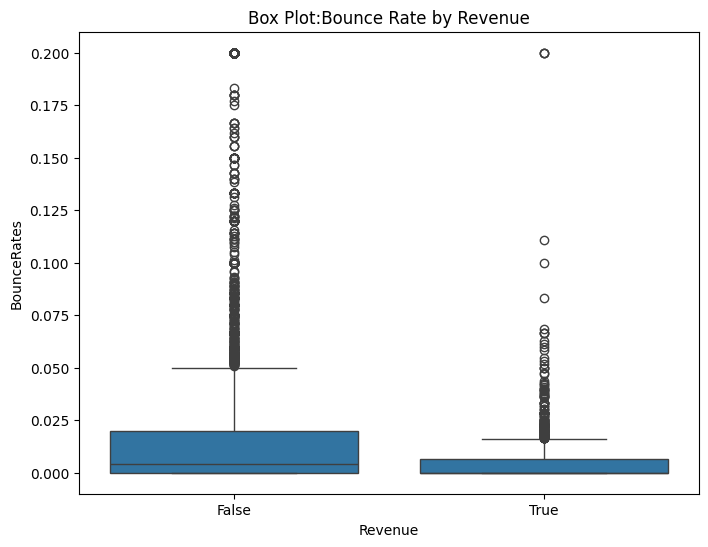

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Revenue',y='BounceRates',data=data)
plt.title('Box Plot:Bounce Rate by Revenue')
plt.show()

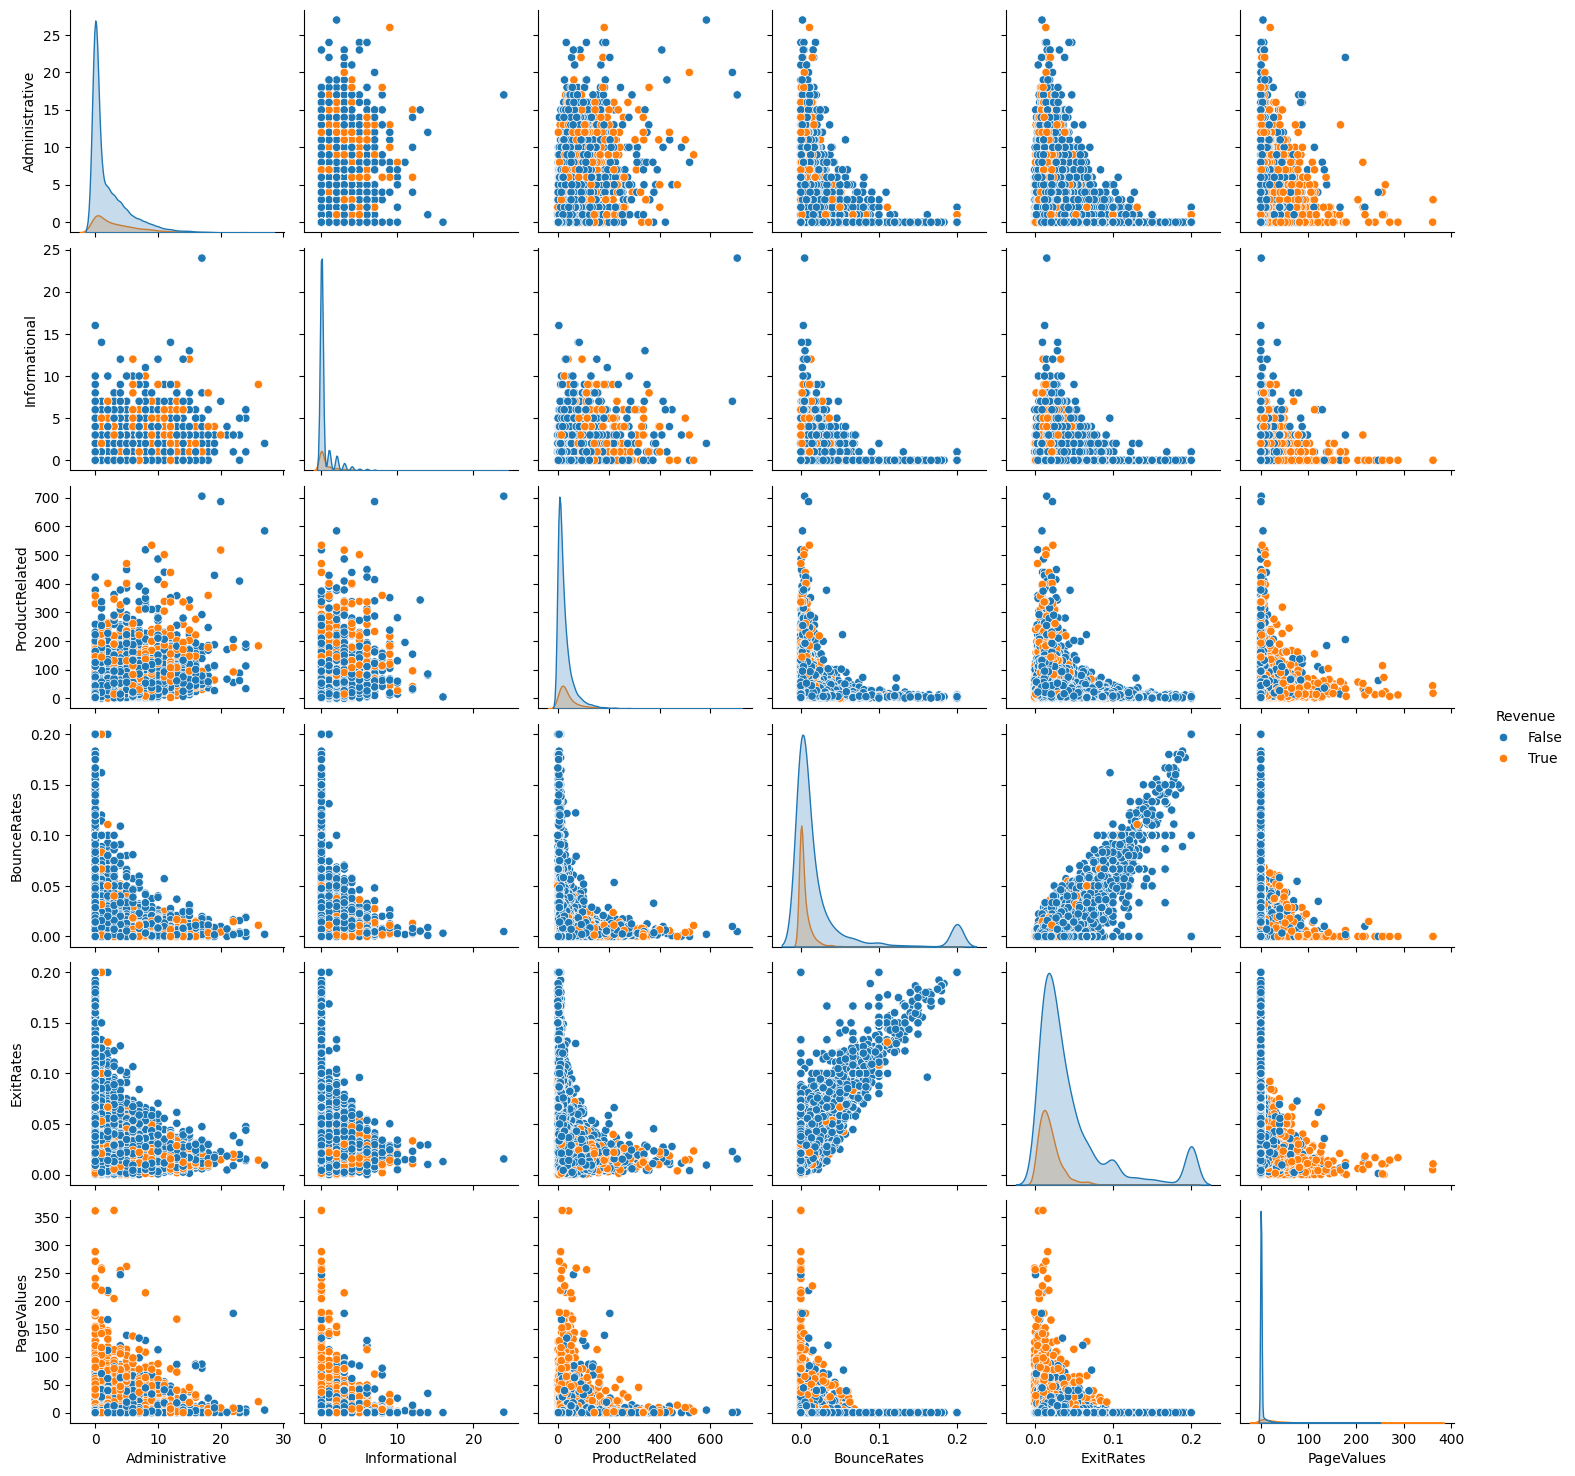

In [ ]:
numerical_features=['Administrative','Informational','ProductRelated','BounceRates','ExitRates','PageValues']
sns.pairplot(data[numerical_features+['Revenue']],hue='Revenue',diag_kind='kde')
plt.show()

### Data Preprocessing

In [ ]:
# Encoding categorical variables
categorical_cols=['Month','VisitorType','Weekend']
label_encoders={}
for col in categorical_cols:
    le=LabelEncoder()
    data[col]=le.fit_transform(data[col])
    label_encoders[col]=le

In [ ]:
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,2,0,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,2,0,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,2,0,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,2,0,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,2,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,1,4,6,1,1,2,1,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,7,3,2,1,8,2,1,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,7,3,2,1,13,2,1,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,7,2,2,3,11,2,0,False


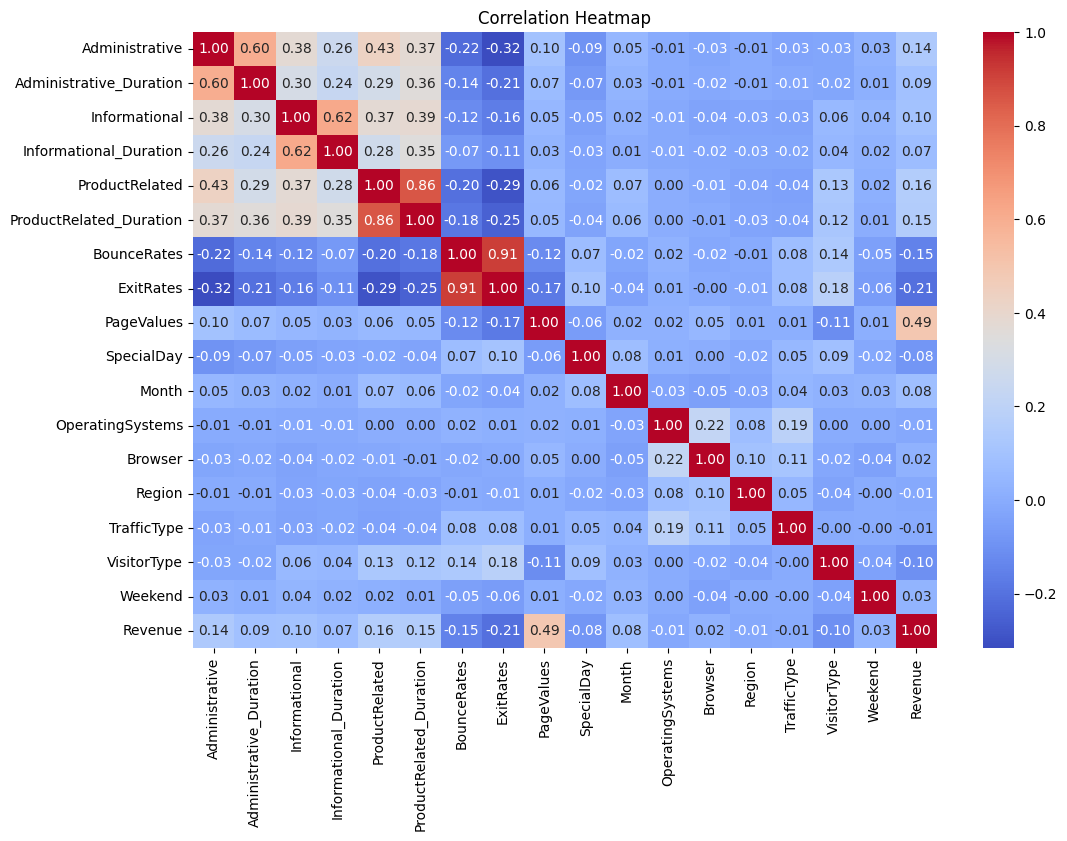

In [ ]:
plt.figure(figsize=(12,8))
correlation_matrix=data.corr()
sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Separating features and target
X=data.drop('Revenue',axis=1)
y=data['Revenue']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
# Standardize numerical features
scaler=StandardScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test=pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns)

Scaling features to have a mean of 0 and a standard deviation of 1

In [ ]:
X_train

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,1.712088,3.624745,-0.395782,-0.244589,0.058405,0.083393,-0.353793,-0.612923,0.341014,3.663440,0.353266,0.950345,0.365443,-0.063769,-0.515854,0.407167,-0.549238
1,-0.698294,-0.452341,-0.395782,-0.244589,-0.629459,-0.539163,0.360698,1.159262,-0.320268,-0.311499,1.196488,-1.228182,3.251075,-0.063769,-0.764918,0.407167,1.820703
2,-0.698294,-0.452341,-0.395782,-0.244589,-0.629459,-0.599504,-0.458865,0.136746,-0.320268,-0.311499,-1.754790,-0.138919,4.405328,-0.898557,-0.515854,0.407167,-0.549238
3,-0.095698,1.429605,-0.395782,-0.244589,-0.331385,0.009963,-0.202751,-0.118883,0.716100,3.663440,0.353266,0.950345,-0.211683,-0.481163,-0.515854,0.407167,-0.549238
4,-0.698294,-0.452341,-0.395782,-0.244589,0.012548,-0.187989,-0.458865,-0.873776,2.625461,-0.311499,-0.068345,-0.138919,-0.211683,1.605808,-0.515854,0.407167,-0.549238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9859,0.506897,-0.068157,0.388468,-0.244589,-0.285527,-0.317442,-0.243190,0.118807,0.882743,-0.311499,0.353266,-0.138919,-0.211683,-0.898557,-0.266790,0.407167,1.820703
9860,0.506897,-0.359543,-0.395782,-0.244589,0.837985,0.737078,-0.398603,-0.623124,-0.320268,-0.311499,-0.068345,-0.138919,-0.211683,0.353626,0.978532,0.407167,-0.549238
9861,-0.698294,-0.452341,-0.395782,-0.244589,-0.331385,-0.394631,0.023231,0.176844,-0.320268,4.657175,0.353266,0.950345,-0.211683,0.353626,-0.017725,0.407167,1.820703
9862,-0.698294,-0.452341,-0.395782,-0.244589,0.952629,0.837152,-0.402730,-0.572522,0.010313,-0.311499,0.774877,-0.138919,-0.211683,0.771020,-0.515854,0.407167,1.820703


In [ ]:
X_test

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,-0.391727,-0.455439,-0.399384,-0.246390,-0.415677,-0.552275,0.068697,0.410339,-0.304867,2.874458,0.350589,-0.124375,1.622186,2.423440,0.230459,0.410265,-0.555803
1,-0.391727,-0.339047,-0.399384,-0.246390,-0.206229,-0.485553,-0.453089,-0.185395,-0.304867,-0.298038,-0.918944,-0.124375,-0.192563,2.010890,-0.261586,0.410265,-0.555803
2,-0.691820,-0.479688,-0.399384,-0.246390,-0.562291,-0.586543,0.152556,-0.285973,4.338903,-0.298038,1.196944,-1.256141,-0.797479,0.360689,-0.507608,-2.459842,-0.555803
3,-0.691820,-0.479688,-0.399384,-0.246390,-0.646070,-0.626939,-0.453089,1.222703,-0.304867,-0.298038,-0.072589,-1.256141,-0.797479,2.010890,-0.261586,0.410265,-0.555803
4,-0.691820,-0.479688,-0.399384,-0.246390,-0.499456,-0.478475,-0.335325,0.088402,-0.304867,-0.298038,-1.342121,-0.124375,1.017270,0.773239,-0.507608,0.410265,-0.555803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,-0.691820,-0.479688,-0.399384,-0.246390,-0.478511,-0.451889,-0.453089,-0.044585,-0.304867,-0.298038,0.350589,-0.124375,1.017270,1.598340,0.476481,0.410265,-0.555803
2462,-0.691820,-0.479688,-0.399384,-0.246390,-0.667015,-0.635743,3.786424,3.334851,-0.304867,-0.298038,-0.072589,-1.256141,-0.797479,2.010890,-0.753631,0.410265,-0.555803
2463,1.708922,1.536974,6.001137,4.585499,0.191722,0.308301,-0.330796,-0.537940,0.239114,-0.298038,0.350589,-0.124375,-0.192563,-0.051862,-0.507608,0.410265,-0.555803
2464,0.808644,-0.177795,-0.399384,-0.246390,-0.017726,-0.140979,-0.055635,-0.064386,-0.304867,-0.298038,-2.188477,-0.124375,-0.192563,-0.876962,2.198638,0.410265,-0.555803


### Original dataset (with Class Imbalance)

Train and Evaluate Models

In [ ]:
models={
    'KNN':KNeighborsClassifier(),
    'Logistic Regression':LogisticRegression(),
    'Random Forest':RandomForestClassifier(),
    'Gradient Boosting':GradientBoostingClassifier(),
    'AdaBoost':AdaBoostClassifier(),
    'SVM':SVC(probability=True),
    'Naive Bayes':GaussianNB(),
    'XGBoost':XGBClassifier(use_label_encoder=False,eval_metric='logloss'),
}

In [ ]:
results_no_smote={}
for name,model in models.items():
    print(f"Training {name}")
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_prob=model.predict_proba(X_test)[:,1] if hasattr(model,'predict_proba') else model.decision_function(X_test)

    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test,y_pred))
    results_no_smote[name]={
        'accuracy':model.score(X_test,y_test),
        'roc_auc':roc_auc_score(y_test,y_prob)
    }

Training KNN

KNN Classification Report:

              precision    recall  f1-score   support

       False       0.89      0.96      0.93      2084
        True       0.64      0.38      0.48       382

    accuracy                           0.87      2466
   macro avg       0.77      0.67      0.70      2466
weighted avg       0.85      0.87      0.86      2466

Training Logistic Regression

Logistic Regression Classification Report:

              precision    recall  f1-score   support

       False       0.89      0.98      0.93      2084
        True       0.76      0.35      0.48       382

    accuracy                           0.88      2466
   macro avg       0.83      0.67      0.71      2466
weighted avg       0.87      0.88      0.86      2466

Training Random Forest

Random Forest Classification Report:

              precision    recall  f1-score   support

       False       0.92      0.96      0.94      2084
        True       0.71      0.54      0.62       382

    

ROC Curves

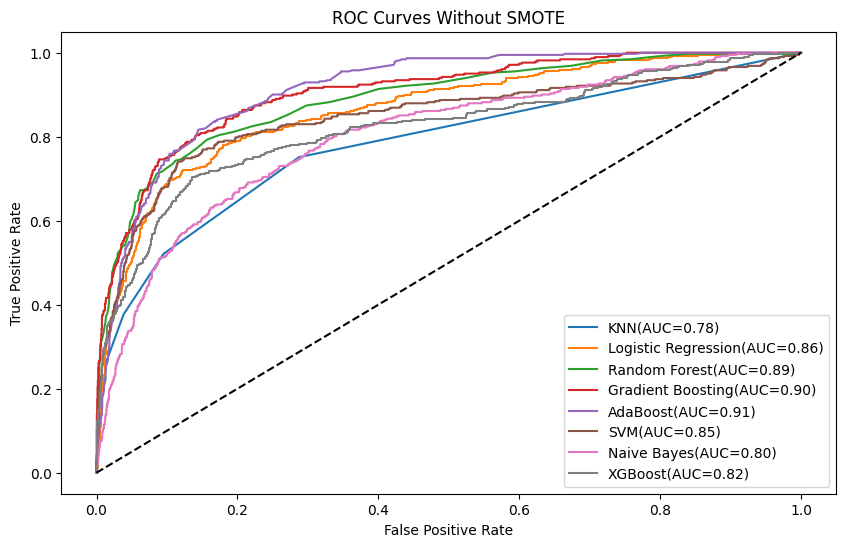

In [ ]:
plt.figure(figsize=(10, 6))
for name,model in models.items():
    y_prob=model.predict_proba(X_test)[:,1] if hasattr(model,'predict_proba') else model.decision_function(X_test)
    fpr, tpr, _=roc_curve(y_test,y_prob)
    plt.plot(fpr,tpr,label=f'{name}(AUC={results_no_smote[name]["roc_auc"]:.2f})')

plt.plot([0, 1],[0, 1],'k--')
plt.title('ROC Curves Without SMOTE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Final Results Summary

In [ ]:
for name,result in results_no_smote.items():
    print(f"{name} with Class Imbalance:Accuracy={result['accuracy']:.2f}, ROC AUC={result['roc_auc']:.2f}")

KNN with Class Imbalance:Accuracy=0.87, ROC AUC=0.78
Logistic Regression with Class Imbalance:Accuracy=0.88, ROC AUC=0.86
Random Forest with Class Imbalance:Accuracy=0.89, ROC AUC=0.89
Gradient Boosting with Class Imbalance:Accuracy=0.89, ROC AUC=0.90
AdaBoost with Class Imbalance:Accuracy=0.89, ROC AUC=0.91
SVM with Class Imbalance:Accuracy=0.88, ROC AUC=0.85
Naive Bayes with Class Imbalance:Accuracy=0.78, ROC AUC=0.80
XGBoost with Class Imbalance:Accuracy=0.88, ROC AUC=0.82


### Addressing Class Imbalance using SMOTE

We can resolve the issue of Class Imbalance using oversampling the minority class (By duplicating entries) or undersampling the majority class to balance the dataset. Here I have used the SMOTE (Synthetic Minority Over-sampling Technique) to generate new samples for the minority class .

In [ ]:
smote=SMOTE(random_state=42)
X_train_resampled,y_train_resampled=smote.fit_resample(X_train,y_train)

resampled_data=pd.concat([pd.DataFrame(X_train_resampled),pd.DataFrame(y_train_resampled)],axis=1)

# Shuffle the resampled data
resampled_data=resampled_data.sample(frac=1,random_state=42).reset_index(drop=True)

# Separate features and labels after shuffling
X_train_resampled=resampled_data.iloc[:,:-1].values
y_train_resampled=resampled_data.iloc[:,-1].values

In [ ]:
X_train_resampled

array([[-0.69829357, -0.45234111, -0.39578211, ..., -0.26678971,
         0.40716739,  1.82070333],
       [-0.69829357, -0.45234111, -0.39578211, ..., -0.51585403,
        -2.49478287,  1.82070333],
       [ 0.63731111,  0.04954095,  0.04901298, ..., -0.51585403,
         0.40716739,  1.82070333],
       ...,
       [ 0.20559967,  0.21302149, -0.39578211, ..., -0.76491836,
         0.40716739, -0.5492383 ],
       [-0.69829357, -0.45234111, -0.39578211, ..., -0.01772538,
         0.40716739, -0.5492383 ],
       [-0.48198076, -0.33961463, -0.39578211, ..., -0.15822903,
        -2.49478287, -0.5492383 ]])

In [ ]:
y_train_resampled

array([False, False,  True, ..., False, False,  True])

Train and Evaluate Models

In [ ]:
results={}
for name,model in models.items():
    print(f"Training {name}")
    model.fit(X_train_resampled,y_train_resampled)
    y_pred=model.predict(X_test)
    y_prob=model.predict_proba(X_test)[:,1] if hasattr(model,'predict_proba') else model.decision_function(X_test)

    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test,y_pred))
    results[name]={
        'accuracy':model.score(X_test,y_test),
        'roc_auc':roc_auc_score(y_test,y_prob)
    }

Training KNN

KNN Classification Report:

              precision    recall  f1-score   support

       False       0.93      0.81      0.87      2084
        True       0.39      0.66      0.49       382

    accuracy                           0.79      2466
   macro avg       0.66      0.74      0.68      2466
weighted avg       0.85      0.79      0.81      2466

Training Logistic Regression

Logistic Regression Classification Report:

              precision    recall  f1-score   support

       False       0.94      0.90      0.92      2084
        True       0.56      0.71      0.63       382

    accuracy                           0.87      2466
   macro avg       0.75      0.81      0.77      2466
weighted avg       0.89      0.87      0.88      2466

Training Random Forest

Random Forest Classification Report:

              precision    recall  f1-score   support

       False       0.95      0.17      0.29      2084
        True       0.17      0.95      0.30       382

    

ROC Curves

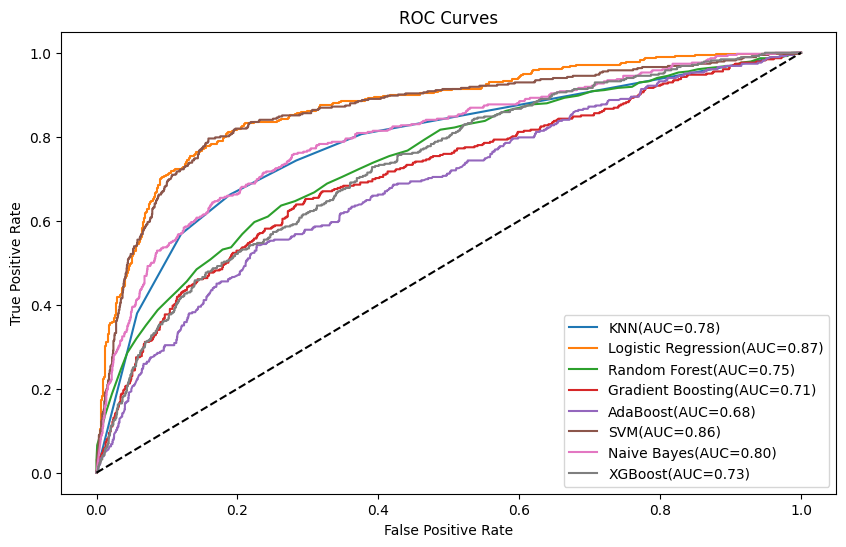

In [ ]:
plt.figure(figsize=(10,6))
for name,model in models.items():
    y_prob=model.predict_proba(X_test)[:,1] if hasattr(model,'predict_proba') else model.decision_function(X_test)
    fpr,tpr,_=roc_curve(y_test,y_prob)
    plt.plot(fpr,tpr,label=f'{name}(AUC={results[name]["roc_auc"]:.2f})')

plt.plot([0,1],[0,1],'k--')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Final Results Summary

In [ ]:
for name,result in results.items():
    print(f"{name} with SMOTE: Accuracy={result['accuracy']:.2f}, ROC AUC={result['roc_auc']:.2f}")

KNN with SMOTE: Accuracy=0.79, ROC AUC=0.78
Logistic Regression with SMOTE: Accuracy=0.87, ROC AUC=0.87
Random Forest with SMOTE: Accuracy=0.29, ROC AUC=0.75
Gradient Boosting with SMOTE: Accuracy=0.16, ROC AUC=0.71
AdaBoost with SMOTE: Accuracy=0.16, ROC AUC=0.68
SVM with SMOTE: Accuracy=0.86, ROC AUC=0.86
Naive Bayes with SMOTE: Accuracy=0.55, ROC AUC=0.80
XGBoost with SMOTE: Accuracy=0.27, ROC AUC=0.73


### Addressing Class Imbalance using Oversampling Minority Class (by Duplicating)

In [ ]:
# Combine X and y for resampling
data_balanced=pd.concat([X_train,y_train.reset_index(drop=True)],axis=1)
majority_class=data_balanced[data_balanced['Revenue']==0]
minority_class=data_balanced[data_balanced['Revenue']==1]

# Upsample the minority class
minority_upsampled=resample(minority_class,replace=True,n_samples=len(majority_class),random_state=42)

# Combine majority and upsampled minority class
data_upsampled=pd.concat([majority_class,minority_upsampled])

# Shuffle the data
data_upsampled=data_upsampled.sample(frac=1,random_state=42).reset_index(drop=True)

# Separate back into X and y
X_upsampled=data_upsampled.drop('Revenue',axis=1)
y_upsampled=data_upsampled['Revenue']

Train and Evaluate Models

In [ ]:
results={}
for name,model in models.items():
    print(f"Training {name}")
    model.fit(X_upsampled,y_upsampled)
    y_pred=model.predict(X_test)
    y_prob=model.predict_proba(X_test)[:,1] if hasattr(model,'predict_proba') else model.decision_function(X_test)

    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test,y_pred))
    results[name]={
        'accuracy':model.score(X_test,y_test),
        'roc_auc':roc_auc_score(y_test,y_prob)
    }

Training KNN

KNN Classification Report:

              precision    recall  f1-score   support

       False       0.92      0.82      0.87      2084
        True       0.39      0.63      0.48       382

    accuracy                           0.79      2466
   macro avg       0.66      0.73      0.68      2466
weighted avg       0.84      0.79      0.81      2466

Training Logistic Regression

Logistic Regression Classification Report:

              precision    recall  f1-score   support

       False       0.94      0.89      0.92      2084
        True       0.54      0.71      0.62       382

    accuracy                           0.86      2466
   macro avg       0.74      0.80      0.77      2466
weighted avg       0.88      0.86      0.87      2466

Training Random Forest

Random Forest Classification Report:

              precision    recall  f1-score   support

       False       0.94      0.90      0.92      2084
        True       0.54      0.67      0.60       382

    

ROC Curves

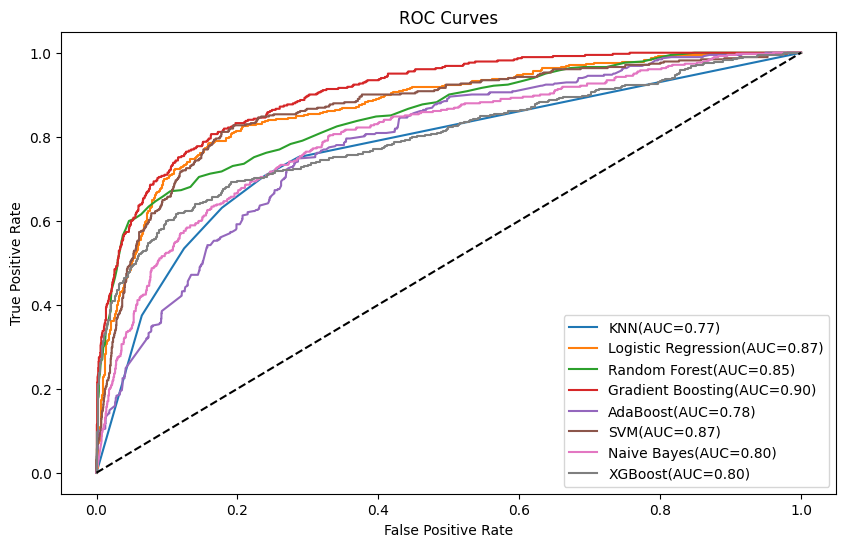

In [ ]:
plt.figure(figsize=(10,6))
for name,model in models.items():
    y_prob=model.predict_proba(X_test)[:,1] if hasattr(model,'predict_proba') else model.decision_function(X_test)
    fpr,tpr,_=roc_curve(y_test,y_prob)
    plt.plot(fpr,tpr,label=f'{name}(AUC={results[name]["roc_auc"]:.2f})')

plt.plot([0,1],[0,1],'k--')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Final Results Summary

In [ ]:
for name,result in results.items():
    print(f"{name} with Oversampling: Accuracy={result['accuracy']:.2f}, ROC AUC={result['roc_auc']:.2f}")

KNN with Oversampling: Accuracy=0.79, ROC AUC=0.77
Logistic Regression with Oversampling: Accuracy=0.86, ROC AUC=0.87
Random Forest with Oversampling: Accuracy=0.86, ROC AUC=0.85
Gradient Boosting with Oversampling: Accuracy=0.64, ROC AUC=0.90
AdaBoost with Oversampling: Accuracy=0.26, ROC AUC=0.78
SVM with Oversampling: Accuracy=0.86, ROC AUC=0.87
Naive Bayes with Oversampling: Accuracy=0.66, ROC AUC=0.80
XGBoost with Oversampling: Accuracy=0.85, ROC AUC=0.80
